In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle
import gzip

# 加载数据
#with gzip.open('./data/20news-bydate_py3.pkz', 'rb') as f:data = pickle.load(f)

#subset代表下载的数据集类型，默认是train，只有训练集，shuffle=True表示打乱数据，random_state设置随机种子
news = fetch_20newsgroups(subset='all', data_home='data',shuffle=True, random_state=42)
# print(news.feature_names)  #这个数据集是没有的，因为没有特征，只有文本数据
# print(news.DESCR) #数据集的描述
print('第一个样本')
print(news.target[0:30])
print(news.data[0])


第一个样本
[10  3 17  3  4 12  4 10 10 19 19 11 19 13  0 17 12 12 11  8  7  5  1  8
 10 14 16  1  6  0]
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


In [2]:
print(type(news)) #<class 'sklearn.utils._bunch.Bunch'>是字典类型的数据
from pprint import pprint
pprint(list(news.target_names))

<class 'sklearn.utils._bunch.Bunch'>
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [3]:

# 提取文本和标签,进行数据分割
x_train, x_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=42)

# 使用TF-IDF转换文本数据，max_features表示只保留最频繁的单词，stop_words='english'表示去除英语停用词
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

# 使用朴素贝叶斯进行分类
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB(alpha=0.05) #alpha=0.1表示平滑参数，防止出现0概率
nb_classifier.fit(X_train_tfidf, y_train)

# 预测
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# 评估模型
from sklearn.metrics import classification_report, accuracy_score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"朴素贝叶斯分类器准确率: {accuracy_nb:.4f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred_nb))

# 计算auc值
from sklearn.metrics import roc_auc_score

y_test_0=(news.target == 1).astype(int)
y_pred_0=(y_pred_nb == 1).astype(int)
auc_nb = roc_auc_score(y_test_0, y_pred_0)
print(f"朴素贝叶斯分类器AUC值: {auc_nb:.4f}")





朴素贝叶斯分类器准确率: 0.9135

分类报告:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       151
           1       0.82      0.89      0.85       202
           2       0.89      0.81      0.85       195
           3       0.73      0.85      0.79       183
           4       0.92      0.91      0.91       205
           5       0.91      0.89      0.90       215
           6       0.93      0.80      0.86       193
           7       0.93      0.95      0.94       196
           8       0.94      0.96      0.95       168
           9       0.98      0.99      0.98       211
          10       0.96      0.98      0.97       198
          11       0.96      0.96      0.96       201
          12       0.91      0.88      0.89       202
          13       0.96      0.95      0.95       194
          14       0.94      0.97      0.96       189
          15       0.90      0.99      0.94       202
          16       0.90      0.96      0.93       188


In [4]:
# 为了保持和原代码兼容，创建类似的结构
newsgroups_train = type('obj', (object,), {
    'data': x_train,
    'target': y_train,
    'target_names': news.target_names
})

newsgroups_test = type('obj', (object,), {
    'data': x_test,
    'target': y_test,
    'target_names': news.target_names
})

# 创建TF-IDF向量化器
print("\n创建TF-IDF向量化器和朴素贝叶斯分类器...")
tfidf = TfidfVectorizer(stop_words='english') #max_features是特征的最大数量，stop_words是停用词
X_train_tfidf = tfidf.fit_transform(newsgroups_train.data)
#打印X_train_tfidf的shape
print(f'X_train_tfidf.shape: {X_train_tfidf.shape}')
X_test_tfidf = tfidf.transform(newsgroups_test.data)

# 创建并训练朴素贝叶斯分类器
print("正在训练模型...")
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, newsgroups_train.target)

# 在测试集上进行预测
print("在测试集上进行预测...")
y_pred = clf.predict(X_test_tfidf)
# 评估模型
from sklearn.metrics import classification_report, accuracy_score
accuracy_nb = accuracy_score(newsgroups_test.target, y_pred) #newsgroups_test.target与y_test是等价的
print(f"朴素贝叶斯分类器准确率: {accuracy_nb:.4f}")
print("\n分类报告:")
print(classification_report(newsgroups_test.target, y_pred,target_names=newsgroups_train.target_names))

# 获取alt.atheism类别的索引
alt_atheism_index = list(newsgroups_train.target_names).index('alt.atheism')
# 计算AUC
from sklearn.metrics import roc_auc_score
y_test_0=(newsgroups_test.target == alt_atheism_index).astype(int)
y_pred_0=(y_pred == alt_atheism_index).astype(int)
roc_auc_score(y_test_0,y_pred_0)


创建TF-IDF向量化器和朴素贝叶斯分类器...
X_train_tfidf.shape: (15076, 148992)
正在训练模型...
在测试集上进行预测...
朴素贝叶斯分类器准确率: 0.9098

分类报告:
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.91      0.89       151
           comp.graphics       0.84      0.87      0.86       202
 comp.os.ms-windows.misc       0.89      0.82      0.85       195
comp.sys.ibm.pc.hardware       0.71      0.84      0.77       183
   comp.sys.mac.hardware       0.92      0.92      0.92       205
          comp.windows.x       0.91      0.88      0.90       215
            misc.forsale       0.93      0.79      0.85       193
               rec.autos       0.93      0.95      0.94       196
         rec.motorcycles       0.93      0.96      0.94       168
      rec.sport.baseball       0.98      0.98      0.98       211
        rec.sport.hockey       0.96      0.98      0.97       198
               sci.crypt       0.96      0.97      0.96       201
         sci.electronics    

0.9540522884189222

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# 创建COUNT向量化器
print("\n创建COUNT向量化器和朴素贝叶斯分类器...")

count_vect = CountVectorizer(stop_words='english') #stop_words是停用词
X_train_counts = count_vect.fit_transform(newsgroups_train.data)
#打印X_train_counts的shape
print(f'X_train_counts.shape: {X_train_counts.shape}')
X_test_counts = count_vect.transform(newsgroups_test.data)

# 创建并训练朴素贝叶斯分类器
print("正在训练模型...")
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_counts, newsgroups_train.target)

# 在测试集上进行预测
print("在测试集上进行预测...")
y_pred = clf.predict(X_test_counts)
# 评估模型
from sklearn.metrics import classification_report, accuracy_score
accuracy_nb = accuracy_score(newsgroups_test.target, y_pred) #newsgroups_test.target与y_test是等价的
print(f"朴素贝叶斯分类器准确率: {accuracy_nb:.4f}")
print("\n分类报告:")
print(classification_report(newsgroups_test.target, y_pred,target_names=newsgroups_train.target_names))

# 获取alt.atheism类别的索引
alt_atheism_index = list(newsgroups_train.target_names).index('alt.atheism')
# 计算AUC
from sklearn.metrics import roc_auc_score
y_test_0=(newsgroups_test.target == alt_atheism_index).astype(int)
y_pred_0=(y_pred == alt_atheism_index).astype(int)
roc_auc_score(y_test_0,y_pred_0)


创建COUNT向量化器和朴素贝叶斯分类器...
X_train_counts.shape: (15076, 148992)
正在训练模型...
在测试集上进行预测...
朴素贝叶斯分类器准确率: 0.8918

分类报告:
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.93      0.90       151
           comp.graphics       0.73      0.92      0.81       202
 comp.os.ms-windows.misc       0.96      0.37      0.53       195
comp.sys.ibm.pc.hardware       0.62      0.86      0.72       183
   comp.sys.mac.hardware       0.83      0.91      0.87       205
          comp.windows.x       0.91      0.85      0.88       215
            misc.forsale       0.88      0.79      0.83       193
               rec.autos       0.90      0.96      0.93       196
         rec.motorcycles       0.94      0.95      0.95       168
      rec.sport.baseball       0.98      0.99      0.98       211
        rec.sport.hockey       0.98      0.97      0.97       198
               sci.crypt       0.96      0.96      0.96       201
         sci.electronics    

0.9639860632533593

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# 读取泰坦尼克号数据
titanic_data = pd.read_csv('./data/titanic.txt')
# 查看数据
print(titanic_data.head())
# 查看数据类型
print(titanic_data.info())

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

In [6]:
# 检查并处理缺失值
print(titanic_data.isnull().sum())

# 使用不带inplace的fillna，返回一个新的DataFrame，不会修改原DataFrame
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mean())
# 查看数据
print(titanic_data.head())
# 查看数据类型
print(titanic_data.info())

row.names       0
pclass          0
survived        0
name            0
age           680
embarked      492
home.dest     559
room         1236
ticket       1244
boat          966
sex             0
dtype: int64
   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  fema

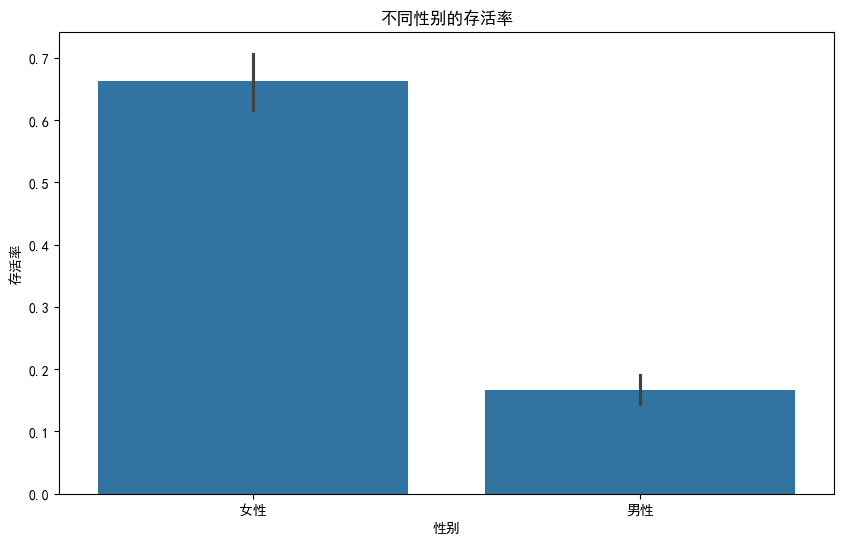

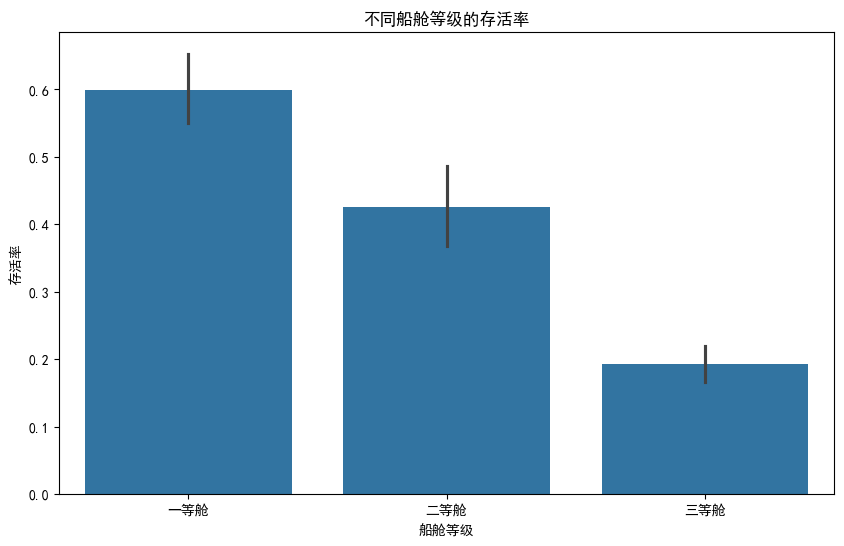

In [7]:
# 数据分析
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 性别与存活率分析
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=titanic_data)
plt.title('不同性别的存活率')
plt.xlabel('性别')
plt.ylabel('存活率')
plt.xticks([0, 1], ['女性', '男性'])
plt.show()

# 船舱等级与存活率分析
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=titanic_data)
plt.title('不同船舱等级的存活率')
plt.xlabel('船舱等级')
plt.ylabel('存活率')
plt.xticks([0, 1, 2], ['一等舱', '二等舱', '三等舱'])
plt.show()



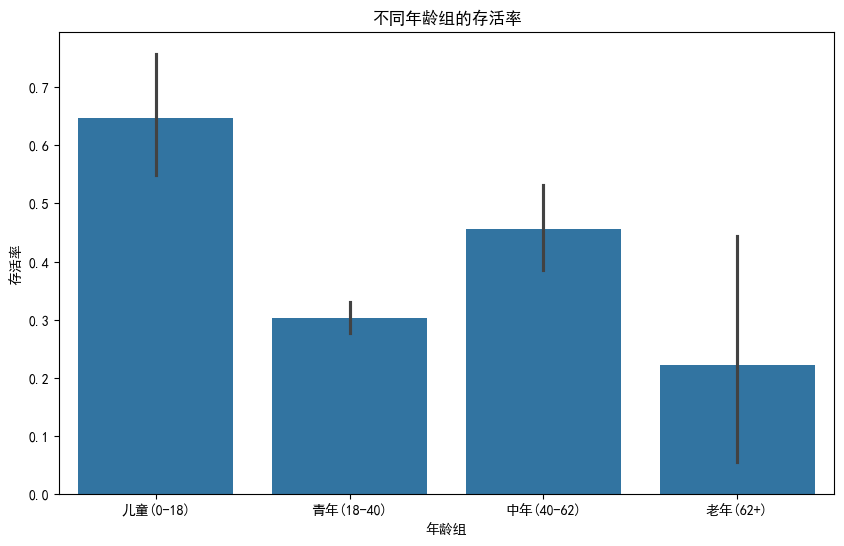

In [18]:

# 年龄分组与存活率分析
# 确保age_group已经创建
titanic_data_with_age_group = titanic_data.copy()
bins = [0, 18, 40, 62, float('inf')]
labels = [0, 1, 2, 3]  # 0:儿童, 1:青年, 2:中年, 3:老年
titanic_data_with_age_group['age_group'] = pd.cut(titanic_data_with_age_group['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='survived', data=titanic_data_with_age_group)
plt.title('不同年龄组的存活率')
plt.xlabel('年龄组')
plt.ylabel('存活率')
plt.xticks([0, 1, 2, 3], ['儿童(0-18)', '青年(18-40)', '中年(40-62)', '老年(62+)'])
plt.show()


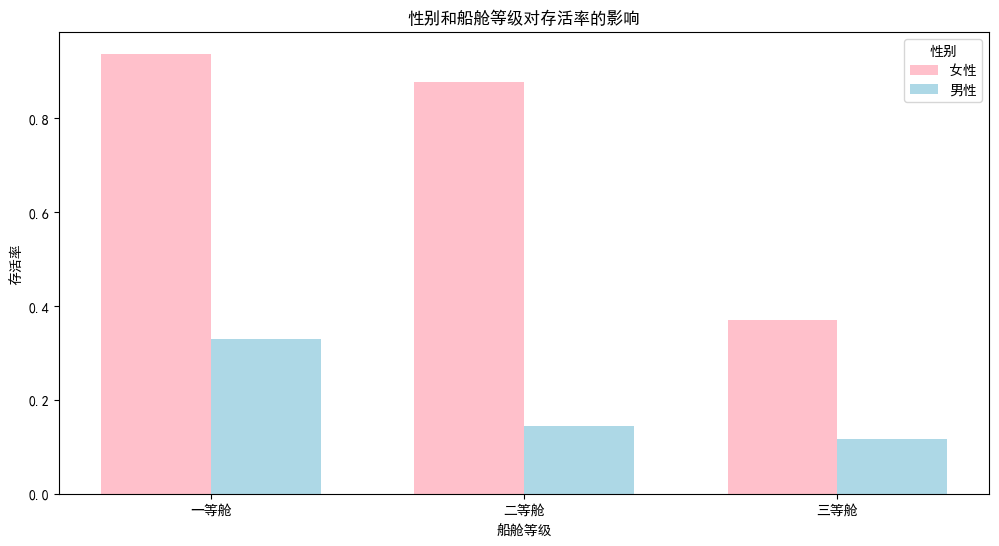

In [21]:

# 性别和船舱等级的交互作用对存活率的影响
plt.figure(figsize=(12, 6))

# 使用不同颜色绘制条形图
# 创建分组数据以手动控制颜色
females = titanic_data[titanic_data['sex'] == 'female'].groupby('pclass')['survived'].mean()
males = titanic_data[titanic_data['sex'] == 'male'].groupby('pclass')['survived'].mean()

# 设置条形图位置
x = np.array([0, 1, 2])
width = 0.35

# 绘制两组条形图，使用不同颜色
plt.bar(x - width/2, females, width, label='女性', color='pink')
plt.bar(x + width/2, males, width, label='男性', color='lightblue')

plt.title('性别和船舱等级对存活率的影响')
plt.xlabel('船舱等级')
plt.ylabel('存活率')
plt.xticks([0, 1, 2], ['一等舱', '二等舱', '三等舱'])
plt.legend(title='性别')
plt.show()



# 准备数据

In [8]:
# 查看数据信息
titanic_data.info()


# 选择特征和目标值
# 选择pclass（船舱等级）、sex（性别）、age_group（年龄组）作为特征
X = titanic_data[['pclass', 'sex', 'age']]

# 检查数据是否为空
print("数据集大小:", X.shape)
print("空值数量:", X.isnull().sum())

# 删除包含空值的行
X = X.dropna()
# 确保y也对应删除相同的行
y = titanic_data.loc[X.index, 'survived']

print("清理后数据集大小:", X.shape)

# 转换特征类型
X['pclass'] = X['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
# 将性别转换为数值型
X['sex'] = X['sex'].map({'female': 0, 'male': 1})

# 划分训练集和测试集，确保有足够的样本
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集的形状
print("\n训练集形状:", X_train.shape)
print("测试集形状:", X_test.shape)

# 统计训练集中的性别数量
print("\n训练集性别分布:")
print(X_train['sex'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   row.names  1313 non-null   int64   
 1   pclass     1313 non-null   object  
 2   survived   1313 non-null   int64   
 3   name       1313 non-null   object  
 4   age        1313 non-null   float64 
 5   embarked   821 non-null    object  
 6   home.dest  754 non-null    object  
 7   room       77 non-null     object  
 8   ticket     69 non-null     object  
 9   boat       347 non-null    object  
 10  sex        1313 non-null   object  
 11  age_group  1313 non-null   category
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 114.4+ KB
数据集大小: (1313, 3)
空值数量: pclass    0
sex       0
age       0
dtype: int64
清理后数据集大小: (1313, 3)

训练集形状: (1050, 3)
测试集形状: (263, 3)

训练集性别分布:
sex
1    679
0    371
Name: count, dtype: int64


In [9]:
# 创建决策树分类器,criterion='entropy'指选取特征为原来的开方根

from sklearn.model_selection import cross_val_score, KFold

# 创建决策树分类器，尝试不同的最大深度参数
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 定义参数网格
param_grid = {
    'max_depth': [3,4,5, 6,None]
    # 'criterion': ['gini', 'entropy']
}

# 创建决策树分类器
dt_classifier = DecisionTreeClassifier(min_impurity_decrease=0.003) #min_impurity_decrease=0.003表示最小不纯度减少0.003

# 使用GridSearchCV进行5折交叉验证
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数和得分
print(f"最佳参数: {grid_search.best_params_}")
print(f"最佳交叉验证得分: {grid_search.best_score_:.4f}")

# 使用最佳参数的模型
best_dt = grid_search.best_estimator_


# 在测试集上进行预测
y_pred = best_dt.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"决策树分类器准确率: {accuracy:.4f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred))


最佳参数: {'max_depth': 3}
最佳交叉验证得分: 0.8162
决策树分类器准确率: 0.8251

分类报告:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       168
           1       0.93      0.56      0.70        95

    accuracy                           0.83       263
   macro avg       0.86      0.77      0.79       263
weighted avg       0.84      0.83      0.81       263



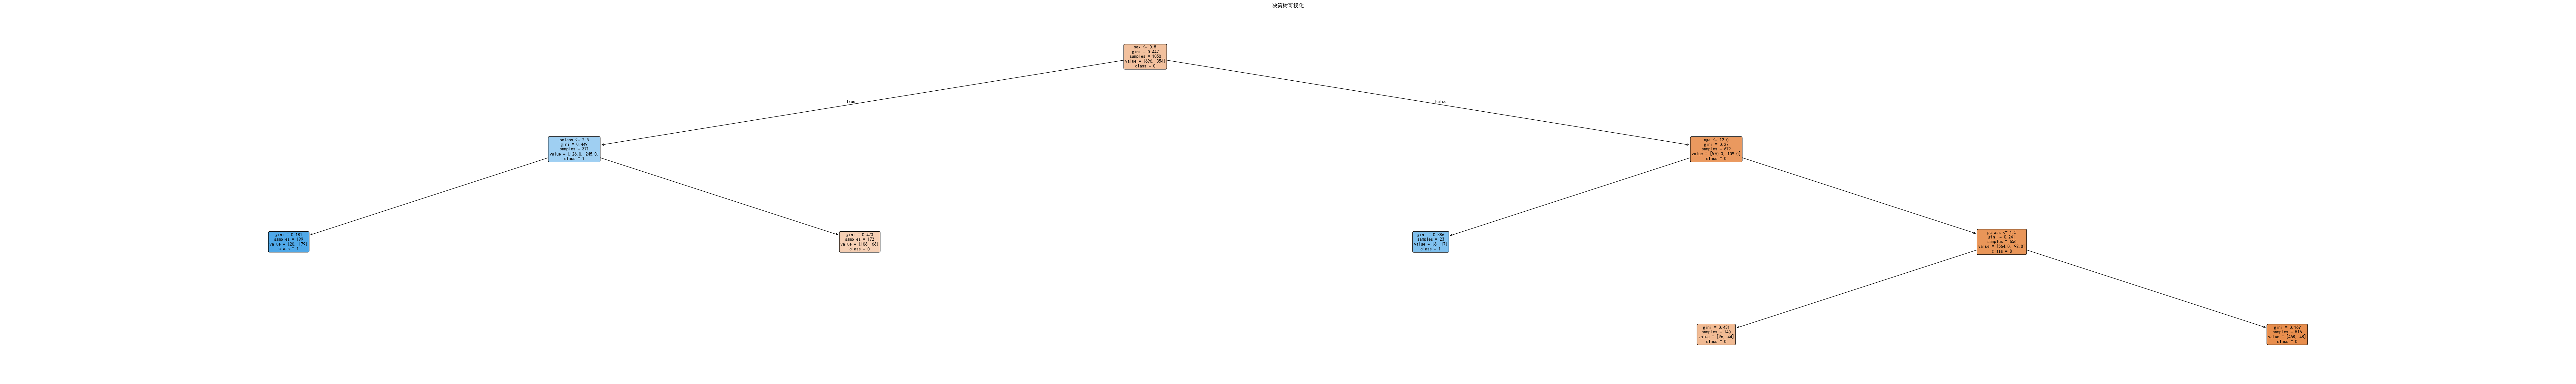

In [ ]:
# 导入matplotlib并设置中文显示
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号


# 可视化决策树(可选，因为特征太多，可能不适合完全可视化)
plt.figure(figsize=(80, 50),dpi=100)
from sklearn.tree import plot_tree
# 可视化决策树
# 获取特征名称列表（如果有的话，否则使用默认名称）
feature_names = None
if hasattr(X_train, 'columns'):  # 如果X_train是DataFrame
    feature_names = X_train.columns.tolist()
elif hasattr(X_train, 'get_feature_names_out'):  # 如果X_train是TF-IDF等转换器的结果
    feature_names = X_train.get_feature_names_out()

# 绘制决策树
plot_tree(best_dt, 
          feature_names=feature_names,
          class_names=[str(c) for c in best_dt.classes_],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # 限制显示深度，避免树太大

plt.title("决策树可视化")
plt.tight_layout()
plt.show()



随机森林分类器准确率: 0.8251

分类报告:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       168
           1       0.92      0.57      0.70        95

    accuracy                           0.83       263
   macro avg       0.86      0.77      0.79       263
weighted avg       0.84      0.83      0.81       263


随机森林特征重要性：
       特征       重要性
1     sex  0.493139
0  pclass  0.326439
2     age  0.180423


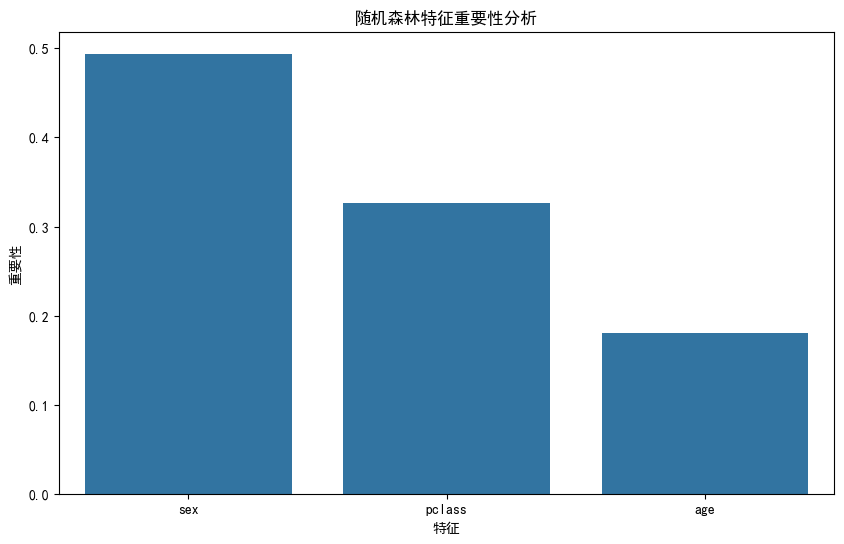


决策树与随机森林比较：
决策树准确率：0.8251
随机森林分类器准确率: 0.8251


In [11]:
# 创建随机森林分类器
# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
rf_classifier = RandomForestClassifier(n_estimators=300, bootstrap=True,max_depth=3,random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)

# 预测
y_pred_rf = rf_classifier.predict(X_test)

# 评估模型
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"随机森林分类器准确率: {accuracy_rf:.4f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred_rf))

# 计算随机森林的特征重要性
rf_feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': rf_classifier.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('重要性', ascending=False)
print("\n随机森林特征重要性：")
print(rf_feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='特征', y='重要性', data=rf_feature_importance)
plt.title('随机森林特征重要性分析')
plt.show()

# 比较决策树和随机森林
print("\n决策树与随机森林比较：")
print(f"决策树准确率：{accuracy:.4f}")
print(f"随机森林分类器准确率: {accuracy_rf:.4f}")

In [12]:
# 使用网格搜索为随机森林寻找最优超参数
from sklearn.model_selection import GridSearchCV

# 定义要搜索的超参数网格
param_grid = {
    'n_estimators': [ 300, 500, 800,1000,2000],
    'max_depth': [2,3,4,5, 7]
}

# 创建随机森林模型
rf = RandomForestClassifier(random_state=1)

# 创建网格搜索对象,verbose=1表示打印详细信息
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 在训练数据上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"\n最佳超参数组合: {grid_search.best_params_}")
print(f"最佳交叉验证得分: {grid_search.best_score_:.4f}")

# 使用最佳参数创建随机森林模型
best_rf_model = grid_search.best_estimator_

# 在测试集上评估最佳模型
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"最佳随机森林模型在测试集上的准确率: {best_rf_accuracy:.4f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits

最佳超参数组合: {'max_depth': 3, 'n_estimators': 500}
最佳交叉验证得分: 0.8267
最佳随机森林模型在测试集上的准确率: 0.8251



优化前随机森林准确率: 0.8251
优化后随机森林准确率: 0.8251
准确率提升: 0.00%


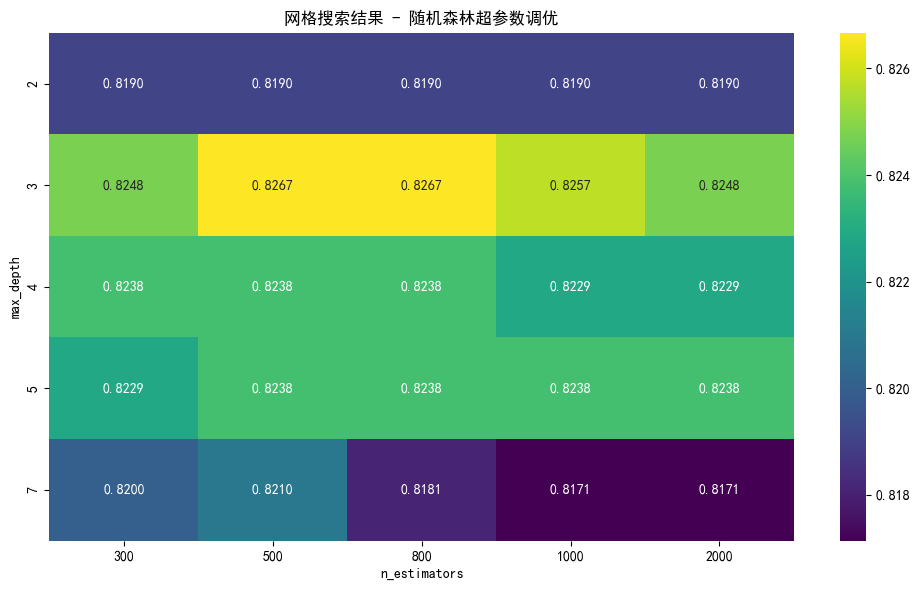

In [13]:

# 比较原始随机森林和调优后的随机森林
print(f"\n优化前随机森林准确率: {accuracy_rf:.4f}")
print(f"优化后随机森林准确率: {best_rf_accuracy:.4f}")
print(f"准确率提升: {(best_rf_accuracy-accuracy_rf)*100:.2f}%")

# 可视化网格搜索结果
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(
    values='mean_test_score', 
    index='param_max_depth', 
    columns='param_n_estimators'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.4f')
plt.title('网格搜索结果 - 随机森林超参数调优')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()
